In [3]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import seaborn as sns

In [6]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [7]:
iris = load_iris()

In [8]:
x = iris.data
y = iris.target

In [7]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [8]:
iris_data = DataFrame(x, columns=['Sepal Lenght', 'Sepal Width', 'Petal Length', 'Petal Width'])

In [9]:
iris_target = DataFrame(y, columns=['Species'])

In [10]:
iris_target.tail()

,Species
145,2
146,2
147,2
148,2
149,2


In [11]:
def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Versicolour'
    else:
        return 'Virginica'

In [12]:
iris_target['Species'] = iris_target['Species'].apply(flower)

In [13]:
iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [14]:
iris = pd.concat([iris_data, iris_target], axis=1)

In [15]:
iris.head()

,Sepal Lenght,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


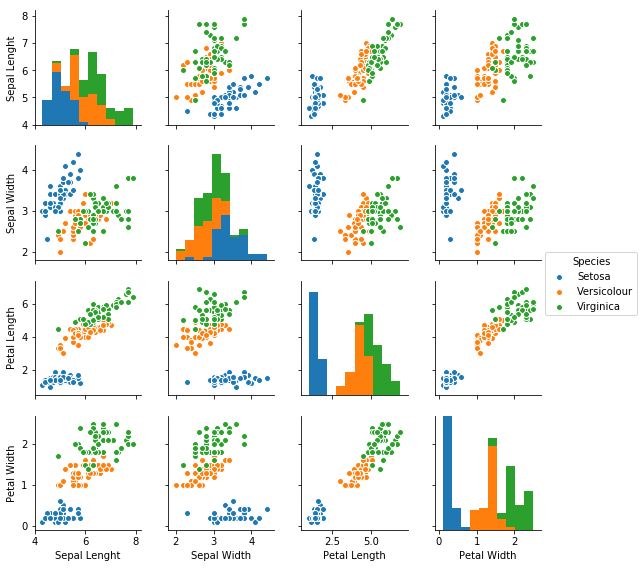

In [17]:
sns.pairplot(iris, hue='Species', size=2)

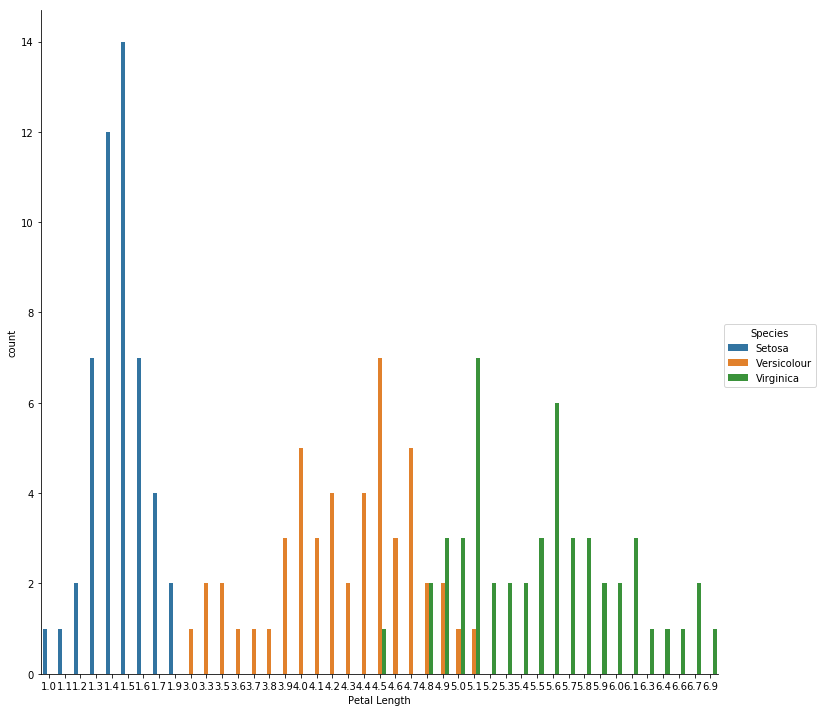

In [26]:
sns.factorplot('Petal Length', data=iris, size=10,  hue="Species", kind='count')

In [38]:
iris.head()

,Sepal Lenght,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


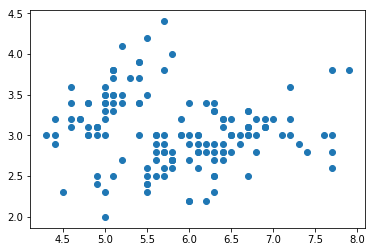

In [45]:
plt.scatter(iris['Sepal Lenght'], iris['Sepal Width'])

In [34]:
import seaborn as sns

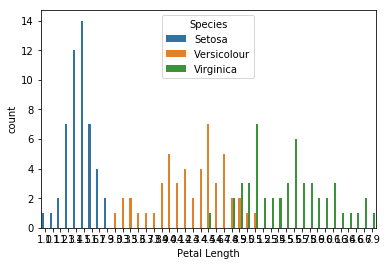

In [35]:
sns.countplot('Petal Length', data=iris, hue='Species')

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [10]:
logreg = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=3)

In [11]:
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
from sklearn import metrics

In [13]:
y_pred = logreg.predict(x_test)

In [14]:
print(metrics.accuracy_score(y_test,y_pred))

0.9333333333333333


In [15]:
# K-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors=6)

In [17]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [18]:
y_pred = knn.predict(x_test)

In [20]:
print(metrics.accuracy_score(y_test,y_pred))

0.95


In [23]:
knn = KNeighborsClassifier(n_neighbors=1)

In [24]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [25]:
y_pred = knn.predict(x_test)

In [27]:
print(metrics.accuracy_score(y_test,y_pred))

0.9666666666666667


In [28]:
#which k is optimal
k_range = range(1,21)
accuracy = []

In [30]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test,y_pred))

Text(0,0.5,'Testing Accuracy')

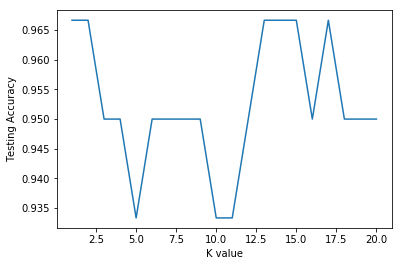

In [31]:
plt.plot(k_range, accuracy)
plt.xlabel('K value')
plt.ylabel('Testing Accuracy')